https://www.tensorflow.org/tutorials/images/classification

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

tf.__version__

'2.9.3'

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob("*/*.jpg"))[:3]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg')]

In [6]:
len(list(data_dir.glob("*/*.jpg")))

3670

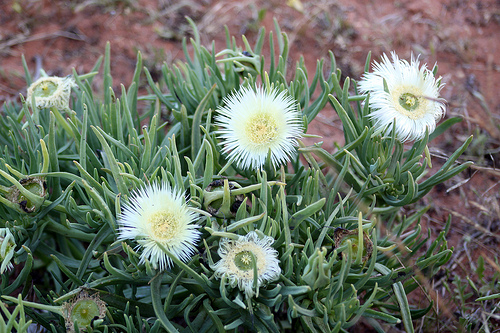

In [7]:
PIL.Image.open(list(data_dir.glob("*/*.jpg"))[11])

In [8]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [9]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

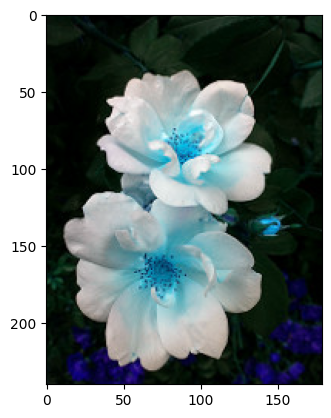

In [10]:
plt.imshow(img)
plt.show()

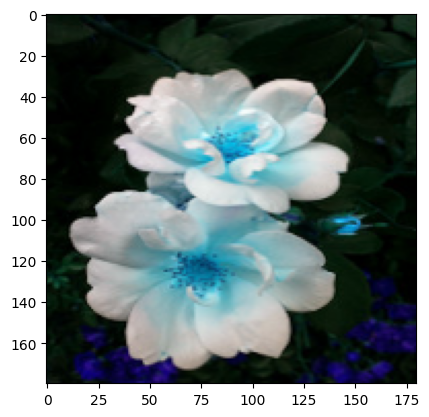

In [11]:
plt.imshow(cv2.resize(img,(180,180)))
plt.show()

In [12]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])
        
X = np.array(X)
y = np.array(y)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [14]:
del X
del y

In [15]:
X_train_scaled[0].shape

(180, 180, 3)

In [16]:
cnn = Sequential([
    
    layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape=(180,180,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(16, activation="relu"),
    layers.Dense(5, activation="softmax")
    
])

cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

cnn.fit(X_train_scaled, y_train, epochs=20)  

Epoch 1/20
86/86 [==============================] - 5s 28ms/step - loss: 1.7215 - accuracy: 0.3670
Epoch 2/20
86/86 [==============================] - 2s 27ms/step - loss: 1.0955 - accuracy: 0.5647
Epoch 3/20
86/86 [==============================] - 2s 27ms/step - loss: 0.8604 - accuracy: 0.6791
Epoch 4/20
86/86 [==============================] - 2s 28ms/step - loss: 0.5712 - accuracy: 0.8027
Epoch 5/20
86/86 [==============================] - 2s 27ms/step - loss: 0.3307 - accuracy: 0.8961
Epoch 6/20
86/86 [==============================] - 2s 28ms/step - loss: 0.1789 - accuracy: 0.9549
Epoch 7/20
86/86 [==============================] - 2s 27ms/step - loss: 0.1047 - accuracy: 0.9757
Epoch 8/20
86/86 [==============================] - 2s 28ms/step - loss: 0.0652 - accuracy: 0.9873
Epoch 9/20
86/86 [==============================] - 2s 27ms/step - loss: 0.0420 - accuracy: 0.9924
Epoch 10/20
86/86 [==============================] - 2s 27ms/step - loss: 0.0476 - accuracy: 0.9884
Epoch 11/

In [17]:
import gc  # Python bellek yönetimi modülü

gc.collect() 

7433

In [18]:
cnn.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 18ms/step - loss: 2.8483 - accuracy: 0.5610


[2.8483388423919678, 0.5610021948814392]

In [19]:
y_pred = cnn.predict(X_test_scaled)

29/29 [==============================] - 0s 12ms/step


In [20]:
y_predicted = [np.argmax(i) for i in y_pred]
y_predicted[:5]

[1, 0, 2, 0, 2]

In [21]:
y_test[:5]

array([1, 0, 2, 4, 2])

<Axes: >

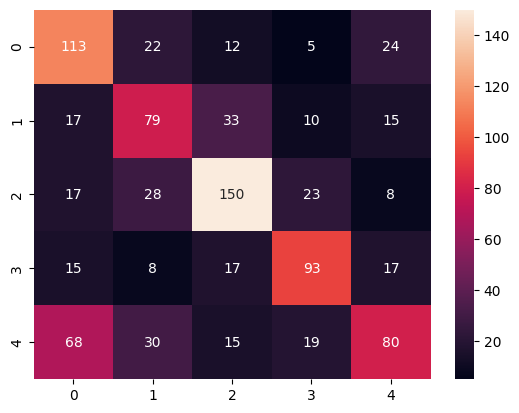

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True, fmt="d")

In [23]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.49      0.64      0.56       176
           1       0.47      0.51      0.49       154
           2       0.66      0.66      0.66       226
           3       0.62      0.62      0.62       150
           4       0.56      0.38      0.45       212

    accuracy                           0.56       918
   macro avg       0.56      0.56      0.56       918
weighted avg       0.57      0.56      0.56       918



## Improve Test Accuracy Using Data Augmentation

In [24]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip(input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

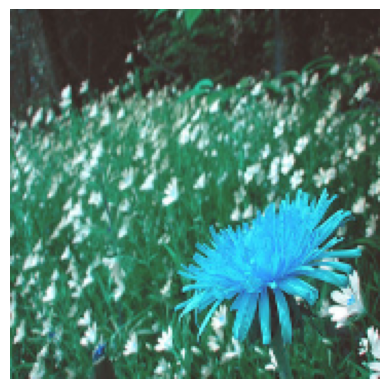

In [25]:
plt.axis('off')
plt.imshow(X_train[0])

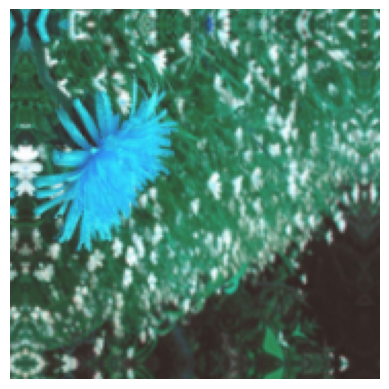

In [26]:
plt.axis('off')
plt.imshow(data_augmentation(X_train)[0].numpy().astype("uint8"))

In [27]:
gc.collect()

115

In [42]:
cnn = Sequential([
    
    data_augmentation,
    layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape=(180,180,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(16, activation="relu"),
    layers.Dense(5, activation="softmax")
    
])

cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])


cnn.fit(X_train_scaled, y_train, epochs=20)  

Epoch 1/20
86/86 [==============================] - 6s 57ms/step - loss: 1.4342 - accuracy: 0.3547
Epoch 2/20
86/86 [==============================] - 5s 58ms/step - loss: 1.2196 - accuracy: 0.5153
Epoch 3/20
86/86 [==============================] - 5s 58ms/step - loss: 1.1109 - accuracy: 0.5661
Epoch 4/20
86/86 [==============================] - 5s 58ms/step - loss: 1.0499 - accuracy: 0.5898
Epoch 5/20
86/86 [==============================] - 5s 57ms/step - loss: 0.9825 - accuracy: 0.6221
Epoch 6/20
86/86 [==============================] - 5s 58ms/step - loss: 0.9454 - accuracy: 0.6261
Epoch 7/20
86/86 [==============================] - 5s 57ms/step - loss: 0.9183 - accuracy: 0.6384
Epoch 8/20
86/86 [==============================] - 5s 63ms/step - loss: 0.8697 - accuracy: 0.6602
Epoch 9/20
86/86 [==============================] - 5s 61ms/step - loss: 0.8507 - accuracy: 0.6664
Epoch 10/20
86/86 [==============================] - 5s 58ms/step - loss: 0.8599 - accuracy: 0.6686
Epoch 11/

In [43]:
cnn.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 13ms/step - loss: 0.8857 - accuracy: 0.7026


[0.885657548904419, 0.7026143670082092]

In [44]:
y_pred = cnn.predict(X_test_scaled)
y_predicted = [np.argmax(i) for i in y_pred]
y_predicted[:5]

29/29 [==============================] - 0s 12ms/step


[1, 4, 2, 4, 3]

In [45]:
y_test[:5]

array([1, 0, 2, 4, 2])

<Axes: >

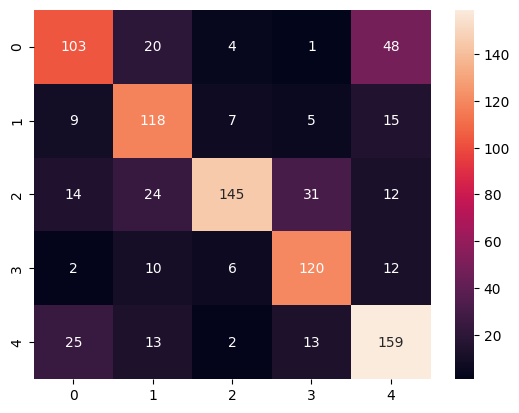

In [46]:
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True, fmt="d")

In [47]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.67      0.59      0.63       176
           1       0.64      0.77      0.70       154
           2       0.88      0.64      0.74       226
           3       0.71      0.80      0.75       150
           4       0.65      0.75      0.69       212

    accuracy                           0.70       918
   macro avg       0.71      0.71      0.70       918
weighted avg       0.72      0.70      0.70       918



******************************************************

In [34]:
unique, counts = np.unique(y_test, return_counts=True)
unique, counts

(array([0, 1, 2, 3, 4]), array([176, 154, 226, 150, 212], dtype=int64))

In [35]:
unique, counts = np.unique(y_train, return_counts=True)
unique, counts

(array([0, 1, 2, 3, 4]), array([465, 479, 672, 549, 587], dtype=int64))

In [36]:
class_to_remove = 2

# Silmek istediğiniz sınıfın indekslerini bulun
indices_to_remove = np.where(y_train == class_to_remove)[0]

# Silmek istediğiniz sayı kadar indeksi seçin (örneğin, ilk 100 indeksi)
indices_to_remove = indices_to_remove[:100]

# Seçilen indeksleri kullanarak veriyi güncelleyin
X_train_filtered = np.delete(X_train, indices_to_remove, axis=0)
y_train_filtered = np.delete(y_train, indices_to_remove, axis=0)

# Yeni veri kümesinin boyutunu kontrol edin
print(X_train_filtered.shape)
print(y_train_filtered.shape)

(2652, 180, 180, 3)
(2652,)


In [37]:
unique, counts = np.unique(y_train_filtered, return_counts=True)
unique, counts

(array([0, 1, 2, 3, 4]), array([465, 479, 572, 549, 587], dtype=int64))